<a href="https://colab.research.google.com/github/lbcarv1972/ICU-Liberation/blob/main/ICU_Liberation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Drive Assembly***

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## ***Authenticate user***

In [3]:
from google.colab import auth
auth.authenticate_user()

# **Importing libraries**

In [4]:
import gspread
from google.auth import default
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# **Obtaining Credentials**

In [5]:
# Get credentials and authorize using 'default' instead of 'GoogleCredentials'
creds, _ = default()
gc = gspread.authorize(creds)

# **Import from Google Spreadsheet**

---



In [6]:
# Import from Google Spreadsheet
spreadsheet_id = '1MIQ60QzzUd6JaOgQomSVOtl_yikHh-JPHNu0z5-pLAs'
sheet = gc.open_by_key(spreadsheet_id)

# **Worksheet Definition**


In [7]:
# Worksheet Definition
worksheet = sheet.worksheet('Entradas')

# **Get all data as a list of lists**





In [8]:
# Get all data as a list of lists
data = worksheet.get_all_values()

# **Getting the data as a Pandas DataFrame**

In [9]:
# Getting the data as a Pandas DataFrame**
df = pd.DataFrame(data[1:], columns=data[0])

# **Creating binary variables according to the Goals**

In [10]:
# Create a new binary variable 'Head_elevation__Target'
df['Cabeceira_elevada_Target'] = df['Cabeceira_elevada'].apply(lambda x: 1 if x == 'Sim' else 0)


In [11]:
# Create a new binary variable 'Glycemic_Target Protocol'
df['Protocolo_glicemico_Target'] = df['Protocolo_glicemico'].apply(lambda x: 1 if x == 'Sim' else 0)

In [12]:
# Assume all answers except 'No' as a goal for Gastritis Prevention
# Create a new binary variable 'Gastritis_prevention_Target'
df['Prevencao_gastrite_Target'] = df['Prevenção_gastrite'].apply(lambda x: 1 if x != 'Não' else 0)

In [13]:
# Assume all answers except 'No' as a goal for VTE Prevention
# Create a new binary variable 'VTE_prevention_Target'
df['Prevencao_TEV_Target'] = df['Prevenção_TEV'].apply(lambda x: 1 if x != 'Não' else 0)


In [14]:
# Assume all the answers except 'No' as your Feeding goal
# Create a new binary variable 'Feeding_Target'
df['Dieta_Target'] = df['Dieta'].apply(lambda x: 1 if x != 'Não' else 0)

In [15]:
# Assume the answer 'No' as a goal for Bladder_cath
# Create a new binary variable 'Bladder_cath_Target'
df['Sondagem_vesical_Target'] = df['Sondagem_vesical'].apply(lambda x: 1 if x == 'Não' else 0)

In [16]:
# Assume the target for END is the answer 0 to 3

# Convert the "END" column to numeric, treating errors as NaN
df['END'] = pd.to_numeric(df['END'], errors='coerce')

# Create a new binary variable 'END_Target'
df['END_Target'] = df['END'].apply(lambda x: 1 if 0 <= x <= 3 else 0)

In [17]:
# Assume answer 3 as the goal for BPS

# Convert the "BPS" column to numeric, handling errors like NaN
df['BPS'] = pd.to_numeric(df['BPS'], errors='coerce')


# Create a new binary variable 'BPS_Target'
df['BPS_Target'] = df['BPS'].apply(lambda x: 1 if x == 3 else 0)


In [18]:
# Assume the target response for RASS is 0 and -1

# Convert the "RASS" column to numeric, handling errors like NaN
df['RASS'] = pd.to_numeric(df['RASS'], errors='coerce')

# Create a new binary variable 'RASS_Target'
df['RASS_Target'] = df['RASS'].apply(lambda x: 1 if x in [0, -1] else 0)


In [19]:
# Assume the Negative response as a goal for CAM-ICU
# Create a new binary variable 'CAM_ICU_Target'
df['CAM_ICU_Target'] = df['CAM-ICU'].apply(lambda x: 1 if x == 'Negativo' else 0)

In [20]:
# Assume as target for Analgesic/Sedative all responses except Continuous
# Create a new binary variable 'Analgesic_Sedative_Target'
df['Analgesico_sedativo_Target'] = df['Analgésico_sedativo'].apply(lambda x: 1 if x != 'Contínuo' else 0)

In [21]:
# Assume the TDE target is Yes
# Create a new binary variable 'TDE_Target'
df['TDE_Target'] = df['TDE'].apply(lambda x: 1 if x == 'Sim' else 0)

In [22]:
# Assume the target answer for TRE is Yes
# Create a new binary variable 'TRE_Target'
df['TRE_Target'] = df['TRE'].apply(lambda x: 1 if x == 'Sim' else 0)

In [23]:
# Assume as a target for Mobilization all the answers except 1
# Create a new binary variable 'Mobilization_Target'
df['Mobilizacao_Target'] = df['Mobilização'].apply(lambda x: 1 if x != '1' else 0)

<ipython-input-24-cb2984531ec6>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df.groupby(pd.Grouper(key='Data', freq='M'))[var].agg(['sum', 'size'])


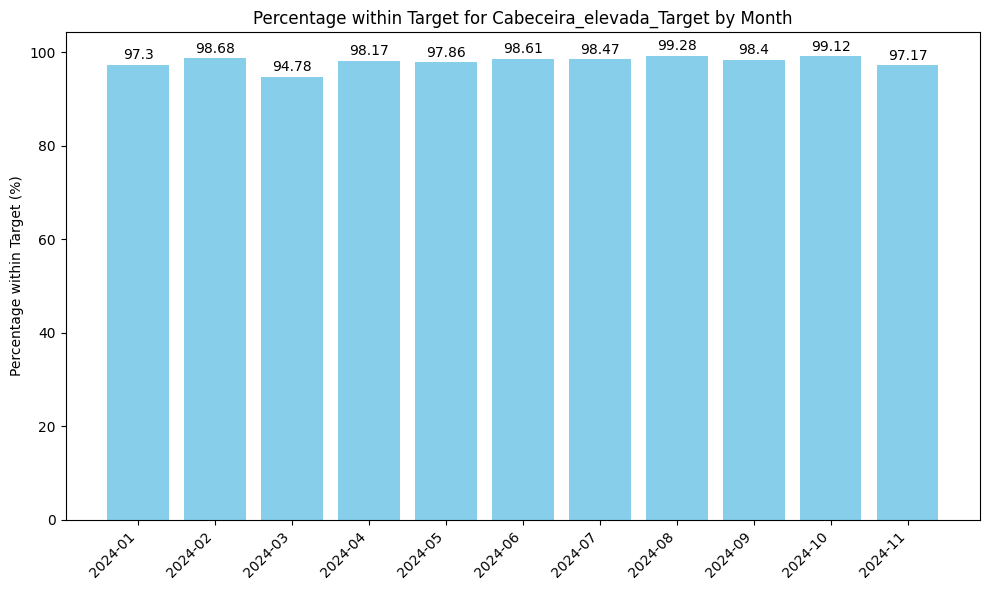

<ipython-input-24-cb2984531ec6>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df.groupby(pd.Grouper(key='Data', freq='M'))[var].agg(['sum', 'size'])


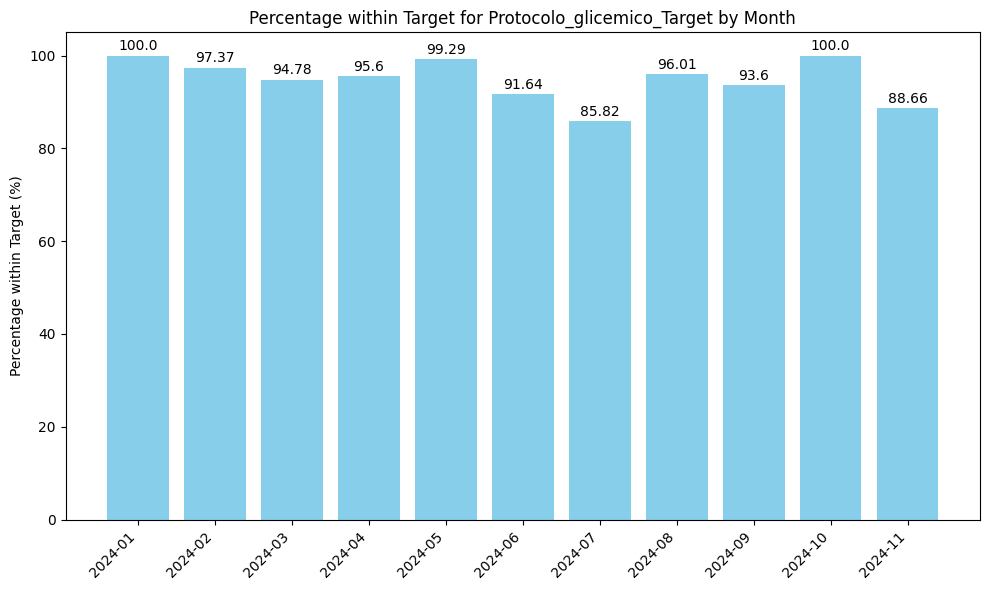

<ipython-input-24-cb2984531ec6>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df.groupby(pd.Grouper(key='Data', freq='M'))[var].agg(['sum', 'size'])


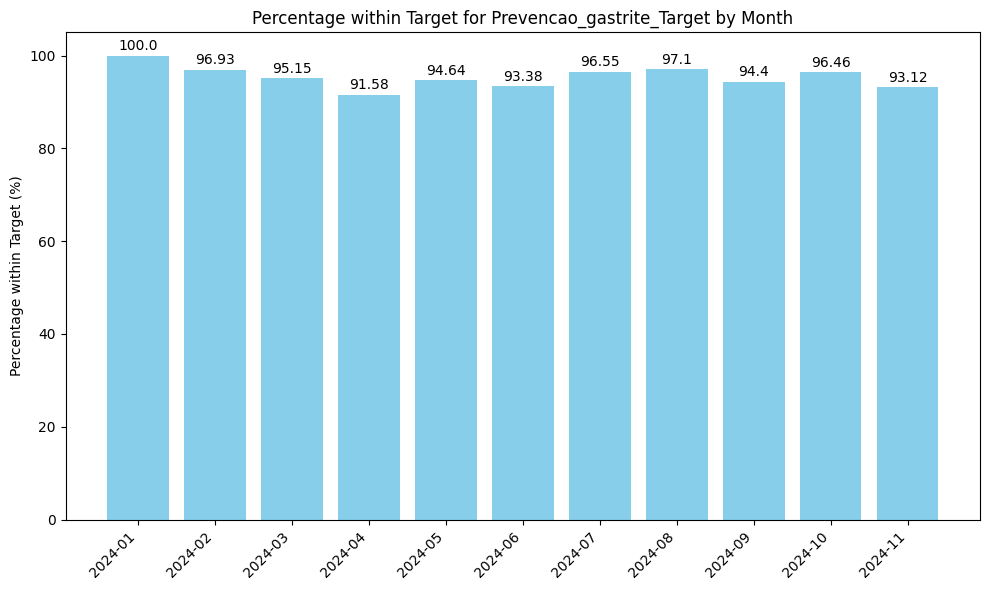

<ipython-input-24-cb2984531ec6>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df.groupby(pd.Grouper(key='Data', freq='M'))[var].agg(['sum', 'size'])


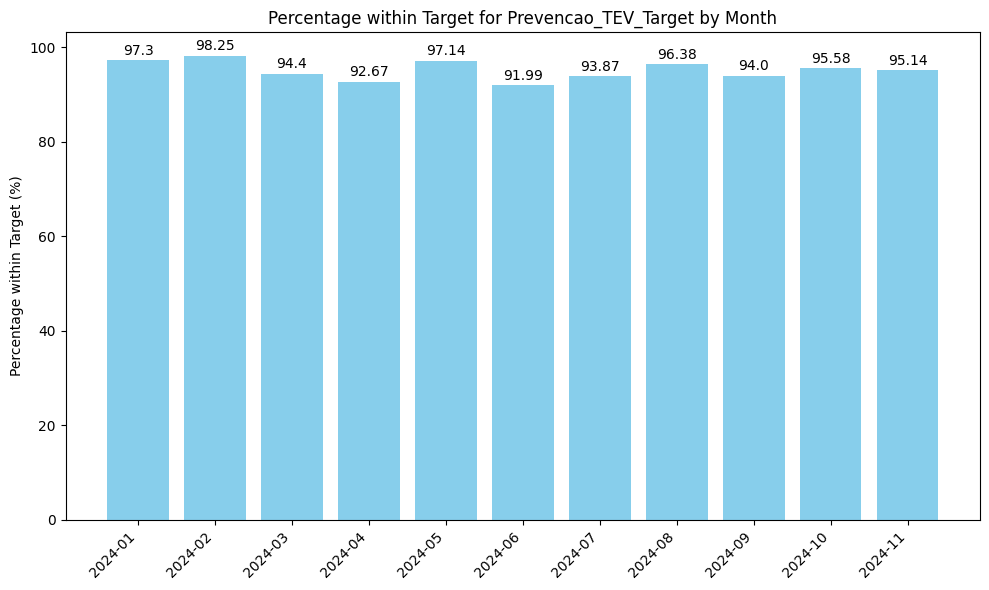

<ipython-input-24-cb2984531ec6>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df.groupby(pd.Grouper(key='Data', freq='M'))[var].agg(['sum', 'size'])


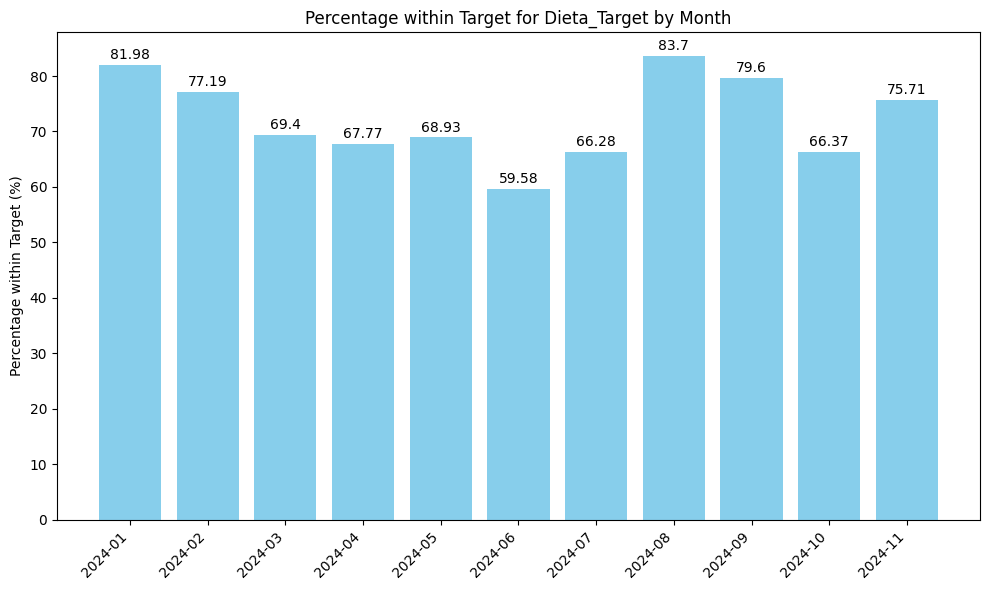

<ipython-input-24-cb2984531ec6>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df.groupby(pd.Grouper(key='Data', freq='M'))[var].agg(['sum', 'size'])


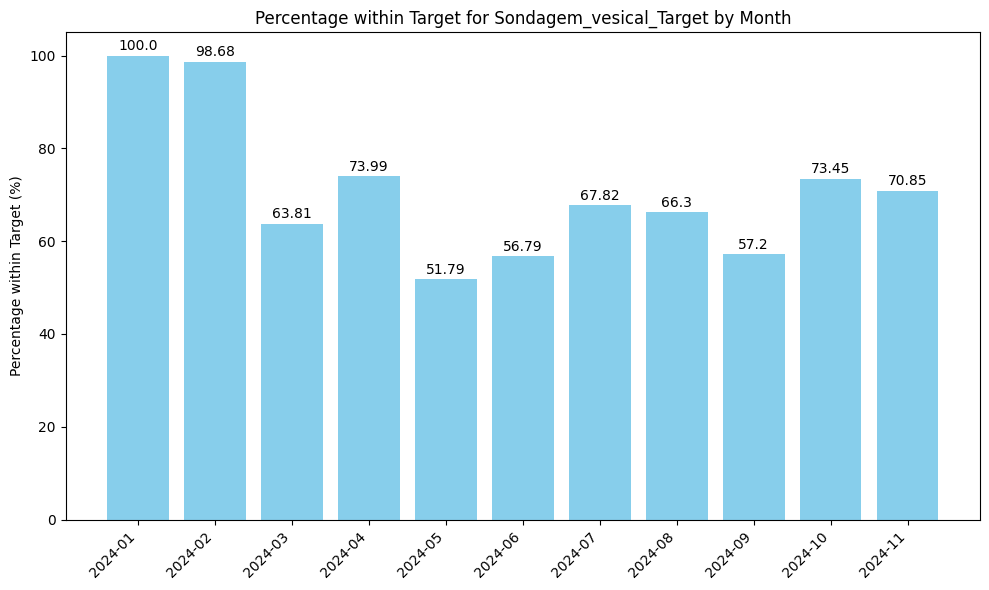

<ipython-input-24-cb2984531ec6>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df.groupby(pd.Grouper(key='Data', freq='M'))[var].agg(['sum', 'size'])


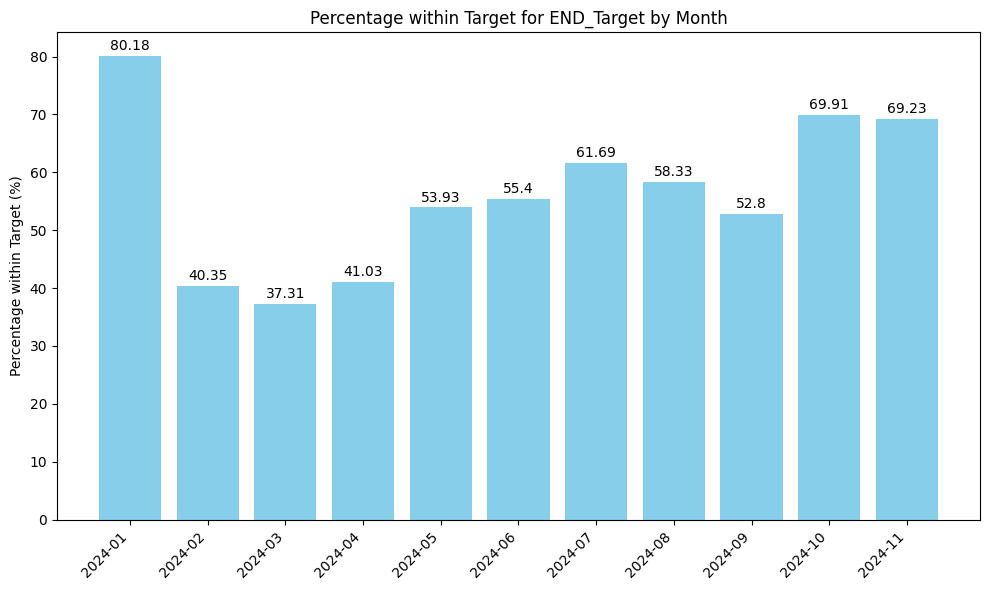

<ipython-input-24-cb2984531ec6>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df.groupby(pd.Grouper(key='Data', freq='M'))[var].agg(['sum', 'size'])


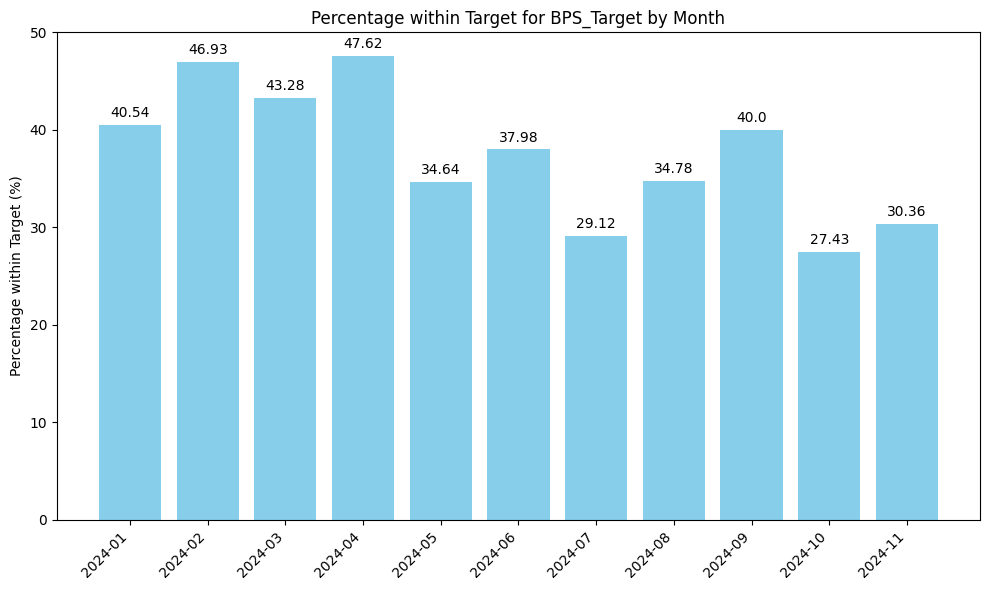

<ipython-input-24-cb2984531ec6>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df.groupby(pd.Grouper(key='Data', freq='M'))[var].agg(['sum', 'size'])


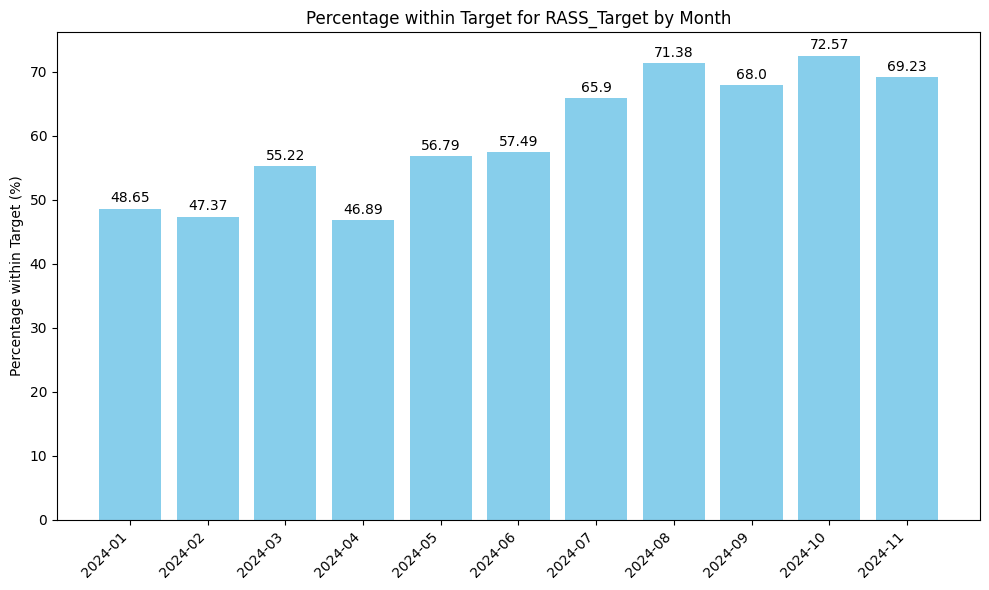

<ipython-input-24-cb2984531ec6>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df.groupby(pd.Grouper(key='Data', freq='M'))[var].agg(['sum', 'size'])


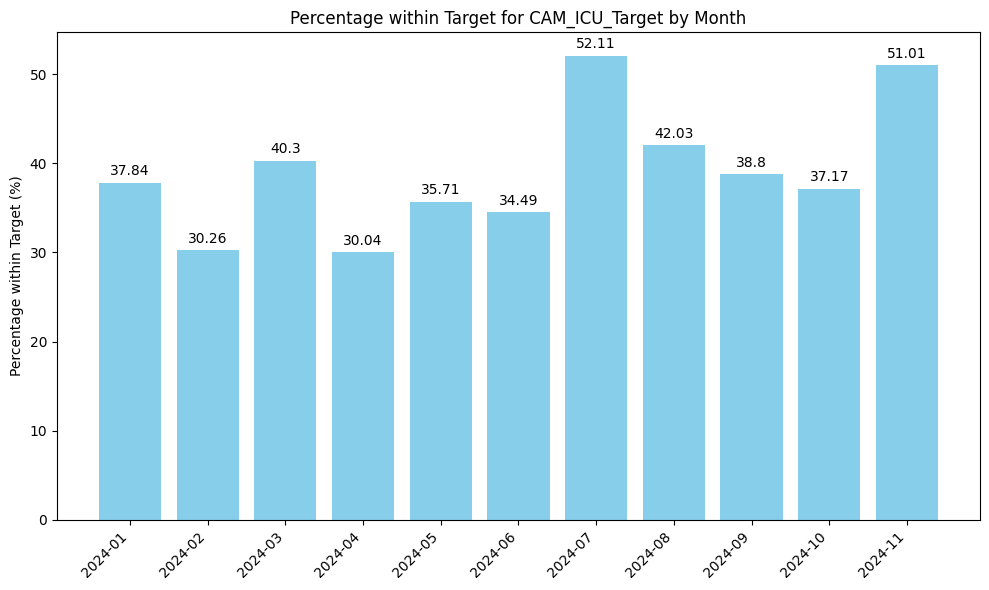

<ipython-input-24-cb2984531ec6>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df.groupby(pd.Grouper(key='Data', freq='M'))[var].agg(['sum', 'size'])


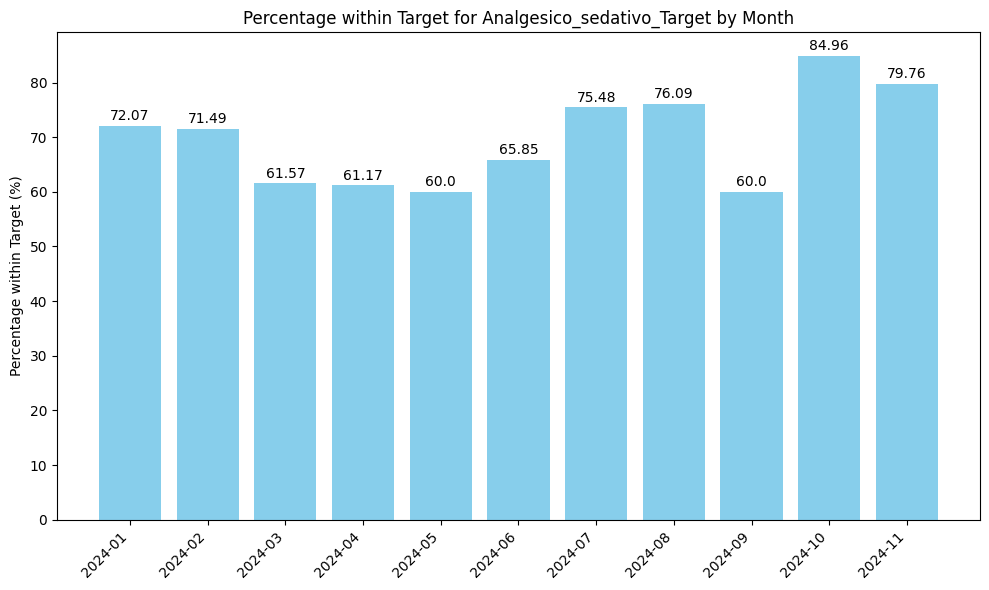

<ipython-input-24-cb2984531ec6>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df.groupby(pd.Grouper(key='Data', freq='M'))[var].agg(['sum', 'size'])


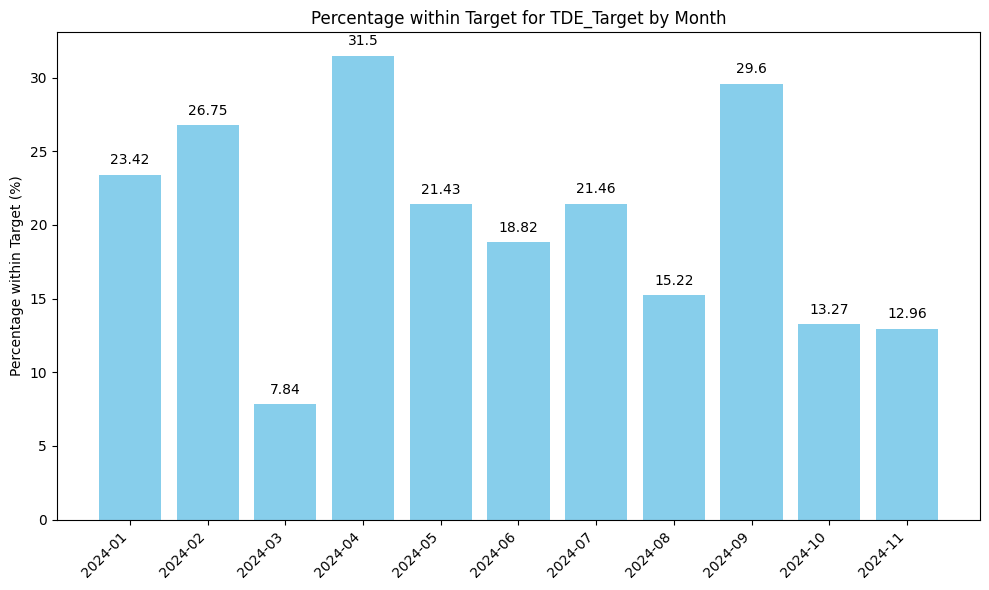

<ipython-input-24-cb2984531ec6>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df.groupby(pd.Grouper(key='Data', freq='M'))[var].agg(['sum', 'size'])


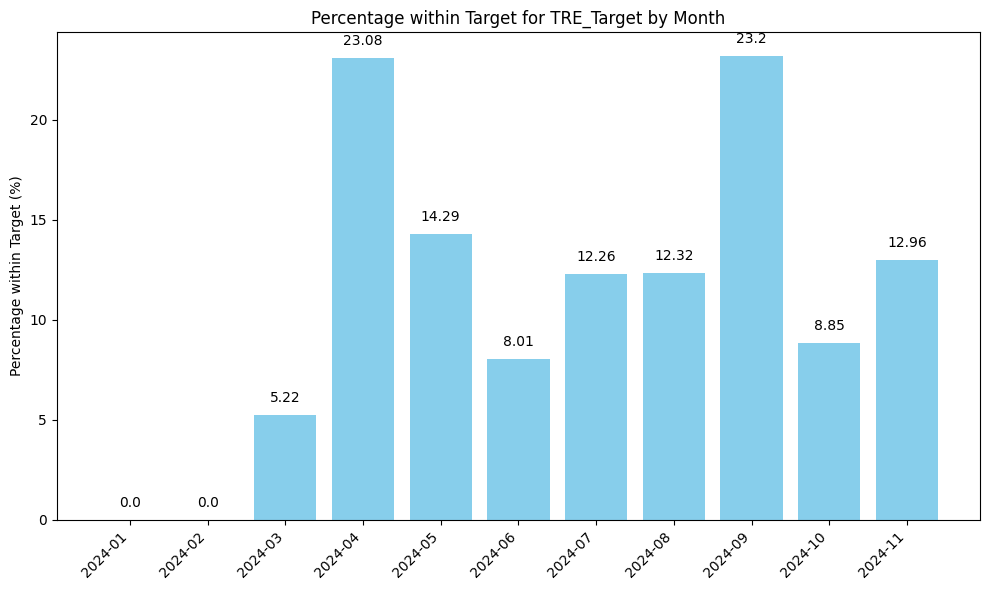

<ipython-input-24-cb2984531ec6>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df.groupby(pd.Grouper(key='Data', freq='M'))[var].agg(['sum', 'size'])


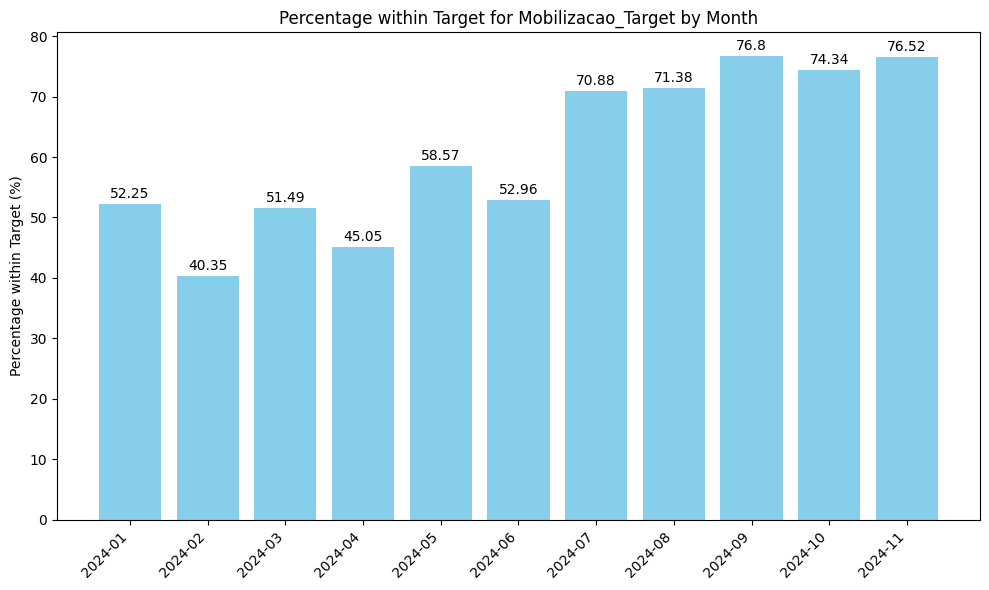

In [24]:
# Create a column chart for each binary variable of the percentage response values ​​within the Target in each month.

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and it has a 'Data' column with datetime objects

# List of binary target variables
binary_vars = ['Cabeceira_elevada_Target', 'Protocolo_glicemico_Target',
               'Prevencao_gastrite_Target', 'Prevencao_TEV_Target',
               'Dieta_Target', 'Sondagem_vesical_Target', 'END_Target',
               'BPS_Target', 'RASS_Target', 'CAM_ICU_Target',
               'Analgesico_sedativo_Target', 'TDE_Target', 'TRE_Target',
               'Mobilizacao_Target']

# Convert 'Data' column to datetime if it's not already
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce') # Specify the correct format

# Group data by month and calculate percentage within target for each variable
for var in binary_vars:
    # Group by month
    grouped = df.groupby(pd.Grouper(key='Data', freq='M'))[var].agg(['sum', 'size'])

    # Calculate percentage within target
    grouped['Percentage'] = (grouped['sum'] / grouped['size']) * 100

# Create a bar plot for the current variable
    plt.figure(figsize=(10, 6))
    bars=plt.bar(grouped.index.strftime('%Y-%m'), grouped['Percentage'], color='skyblue') # Define 'bars' here before the loop
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Percentage within Target (%)')
    plt.title(f'Percentage within Target for {var} by Month')
    plt.tight_layout()

# Add the percentage values ​​in the columns
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

    plt.show()  # Show the plot for the current variable

# ***Chi-Square analysis of categorical variables and Variance of numerical variables***

In [27]:
# Analyze all binary variables of Inputs in relation to Month_Year

# Since your target variables are binary (indicating whether a certain goal was met or not) and 'Mes_Ano' is categorical, we'll use a method called Chi-squared test for independence.
# It's appropriate for testing the relationship between two categorical variables, especially when dealing with binary outcomes.

import statsmodels.api as sm
from scipy import stats

# Convert Date column to Month_Year
df['Mes_Ano'] = df['Data'].dt.strftime('%m-%Y')

# Convert the Month_Year column to categorical
df['Mes_Ano'] = pd.Categorical(df['Mes_Ano'])

# Perform Chi-square analysis

binary_vars = ['Cabeceira_elevada_Target', 'Protocolo_glicemico_Target', 'Prevencao_gastrite_Target', 'Prevencao_TEV_Target', 'Dieta_Target', 'Sondagem_vesical_Target', 'END_Target', 'BPS_Target', 'RASS_Target', 'CAM_ICU_Target', 'Analgesico_sedativo_Target', 'TDE_Target', 'TRE_Target', 'Mobilizacao_Target']

results = []
for var in binary_vars:
  contingency_table = pd.crosstab(df['Mes_Ano'], df[var])
  chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
  significance = "Sim" if p_val < 0.05 else "Não"  # Determine significance
  results.append([var, chi2_stat, f'{p_val:.3f}', dof, significance])

results_df = pd.DataFrame(results, columns=['Variable', 'Chi-squared Statistic', 'P-value', 'Degrees of Freedom', 'Significância'])

# Apply styling
def highlight_significance(s):
    is_significant = s == "Sim"
    return ['background-color: salmon' if v else '' for v in is_significant]

styled_results_df = results_df.style.apply(highlight_significance, subset=['Significância'])

# Display the styled table
display(styled_results_df)


,Variable,Chi-squared Statistic,P-value,Degrees of Freedom,Significância
0,Cabeceira_elevada_Target,19.582774,0.033,10,Sim
1,Protocolo_glicemico_Target,85.272445,0.000,10,Sim
2,Prevencao_gastrite_Target,22.585468,0.012,10,Sim
3,Prevencao_TEV_Target,20.010773,0.029,10,Sim
4,Dieta_Target,68.665111,0.000,10,Sim
5,Sondagem_vesical_Target,225.892524,0.000,10,Sim
6,END_Target,139.569937,0.000,10,Sim
7,BPS_Target,45.143586,0.000,10,Sim
8,RASS_Target,86.649629,0.000,10,Sim
9,CAM_ICU_Target,55.414036,0.000,10,Sim


In [28]:
#Perform the ANOVA analysis of the numerical variables of Entries in relation to Month_Year

import statsmodels.formula.api as smf  # Use smf for formula API
import statsmodels.api as sm # Import the main statsmodels API

df['Mes_Ano'] = pd.Categorical(df['Mes_Ano'])

numeric_vars = ['END', 'BPS', 'RASS']  # Replace with your numeric variables

results = []
for var in numeric_vars:
    # Convert the column to numeric, handling errors
    df[var] = pd.to_numeric(df[var], errors='coerce')
    # Drop rows with NaN values in the current variable
    df_clean = df.dropna(subset=[var])
    model = smf.ols(formula=f'{var} ~ Mes_Ano', data=df_clean).fit() # Use smf.ols
    anova_table = sm.stats.anova_lm(model, typ=2) # Use sm.stats.anova_lm

# Extract relevant information from the ANOVA table
    fvalue = anova_table['F'][0]
    pvalue = anova_table['PR(>F)'][0]
    significance = "Sim" if pvalue < 0.05 else "Não"

    results.append([var, fvalue, f'{pvalue:.3f}', significance])

results_df = pd.DataFrame(results, columns=['Variável', 'F-value', 'P-value', 'Significance'])

# Apply style to highlight significance
def highlight_significance(s):
    is_significant = s == "Sim"
    return ['background-color: salmon' if v else '' for v in is_significant]

styled_results_df = results_df.style.apply(highlight_significance, subset=['Significance'])

# Display the table with style
display(styled_results_df)


<ipython-input-28-759fb8d87354>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fvalue = anova_table['F'][0]
<ipython-input-28-759fb8d87354>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalue = anova_table['PR(>F)'][0]
<ipython-input-28-759fb8d87354>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fvalue = anova_table['F'][0]
<ipython-input-28-759fb8d87354>:21: FutureWarning: Series.__getitem__ treating keys as positions i

,Variável,F-value,P-value,Significance
0,END,3.281644,0.000,Sim
1,BPS,3.772982,0.000,Sim
2,RASS,9.412895,0.000,Sim
